# Using python to analyze chemical compounds: 

    This project aims to use the Machine Learning approach to deduce possible correlations between the refractive index of a compound and any of its other physical properties. This research project explores the use of Python programming language and machine learning algorithms in the analysis of chemical compounds. Specifically, the project focuses on developing Python scripts that can efficiently and accurately analyze large sets of chemical data to extract important information such as molecular structures, properties, and behaviors. The project includes the use of various Python libraries and modules for data visualization, statistical analysis, and machine learning algorithms, such as clustering and classification. The research findings demonstrate the effectiveness of Python and machine learning in analyzing chemical compounds, providing insights into the potential applications of this technology in the field of chemistry.

# Dataset:

* A complied csv of 42 selected chemical compounds
* Parameters: 
 
 -Melting Point	
 -Boiling Point	
 -Dipole moment	
 -Refractive Index	
 -Epsilon 
 -Relative Density	
 -Mu	
 -Polarity

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

In [5]:
import pandas_datareader as pdr


0.10473854531981844 0.062344372214177594


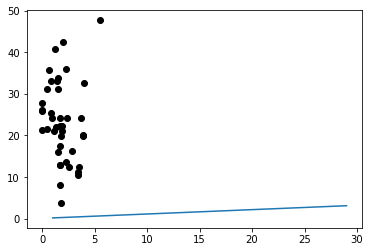

In [8]:
def loss_function(m,b,points):
    total_error=0
    for i in range(len(points)):
        x=points.iloc[i].mu
        y=points.iloc[i].Rd
        total_error+=(y-(m*x_b))**2
    total_error/float(len(points))
    
def gradient_descent(m_now,b_now,points,L):
    m_gradient=0
    b_gradient=0
    
    n=len(points)
    
    for i in range (n):
        x=points.iloc[i].mu
        y=points.iloc[i].Rd
        
        m_gradient+=-(2/n)*x*(y-(m_now*x+b_now))
        b_gradient+=-(2/n)*(y-(m_now*x+b_now))
        
        m=m_now-m_gradient*L
        b=b_now-b_gradient*L
        
        return m,b
m=0
b=0
L=0.0001
epochs=1000

for i in range(epochs):
    m,b=gradient_descent(m,b,df,L)
print(m,b)
plt.scatter(df.mu,df.Rd,color='black')
plt.plot(list(range(1,30)),[m*x+b for x in range (1,30)])
plt.show()

### Read in the dataset

In [7]:
df = pd.read_csv(r"C:\Users\Bhavy\Downloads\URF\chem info.csv")
type(df)

pandas.core.frame.DataFrame

### View the first few rows of the dataset

In [9]:
df.head()

,Substance,Abvr,Melting Point,Boiling Point,Dipole moment,Refractive Index,Epsilon,Rd,mu,Polar,Unnamed: 10
0,Acetic Acid,AA,17,118,1.04900,1.37160,6.15000,12.90000,1.68000,Yes,NaN
1,Acetone,Ac,-95,56,0.78800,1.35870,20.70000,16.20000,2.85000,No,NaN
2,Acetonitrile,CAN,-44,82,0.78200,1.34410,37.50000,11.10000,3.45000,Yes,NaN
3,Anisole,Ani,-3,154,0.99400,1.51700,4.33000,33.00000,1.38000,Yes,NaN
4,Benzene,Bz,5,80,0.87900,1.50110,2.27000,26.20000,0.00000,No,Build linear regression model


Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

### Check the shape of the dataset

In [10]:
df.shape

(41, 11)

Observations: We have 785 observations of 8 columns

### Check the datatype of the variables to make sure that the data is read in properly

In [15]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols] = df[numeric_cols].astype(float)
print(df[numeric_cols])

    Dipole moment  Refractive Index   Epsilon       Rd      mu
0         1.04900           1.37160   6.15000 12.90000 1.68000
1         0.78800           1.35870  20.70000 16.20000 2.85000
2         0.78200           1.34410  37.50000 11.10000 3.45000
3         0.99400           1.51700   4.33000 33.00000 1.38000
4         0.87900           1.50110   2.27000 26.20000 0.00000
5         1.49500           1.55800   5.17000 33.70000 1.55000
6         1.27400           1.62950   2.60000 21.30000 0.00000
7         1.59400           1.46010   2.24000 25.80000 0.00000
8         1.10600           1.52480   5.62000 31.20000 1.54000
9         1.48900           1.44580   4.81000 21.00000 1.15000
10        0.77800           1.42620   2.02000 27.70000 0.00000
11        0.76900           1.39920   3.10000 40.80000 1.18000
12        1.30600           1.55140   9.93000 35.90000 2.27000
13        1.25300           1.44480  10.36000 21.00000 1.86000
14        1.32600           1.42410   8.93000 16.00000 

Observations: 
1. Index numbers are in integer datatype
2. All other variables are in float data types(except polarity).

In [16]:
df.dtypes

Substance            object
Abvr                 object
Melting Point         int64
Boiling Point         int64
Dipole moment       float64
Refractive Index    float64
Epsilon             float64
Rd                  float64
mu                  float64
Polar                object
Unnamed: 10          object
dtype: object

### Let us analyse the quantitative variables in the dataset

In [17]:
df.describe()

,Melting Point,Boiling Point,Dipole moment,Refractive Index,Epsilon,Rd,mu
count,41.00000,41.00000,41.00000,41.00000,41.00000,41.00000,41.00000
mean,-45.31707,109.53659,1.03563,1.43237,17.12829,23.37561,1.87390
std,44.58444,52.14168,0.25226,0.07767,22.36711,9.74297,1.26352
min,-117.00000,35.00000,0.70700,1.28500,2.02000,3.70000,0.00000
25%,-90.00000,77.00000,0.79100,1.37720,3.60000,16.20000,1.15000
50%,-42.00000,87.00000,0.99400,1.42620,7.58000,22.20000,1.69000
75%,-3.00000,144.00000,1.20400,1.49690,24.50000,31.10000,2.37000
max,26.00000,235.00000,1.59400,1.62950,111.00000,47.70000,5.54000


#### Looking at the relationship between numerical variables using pair plots and correlation plots

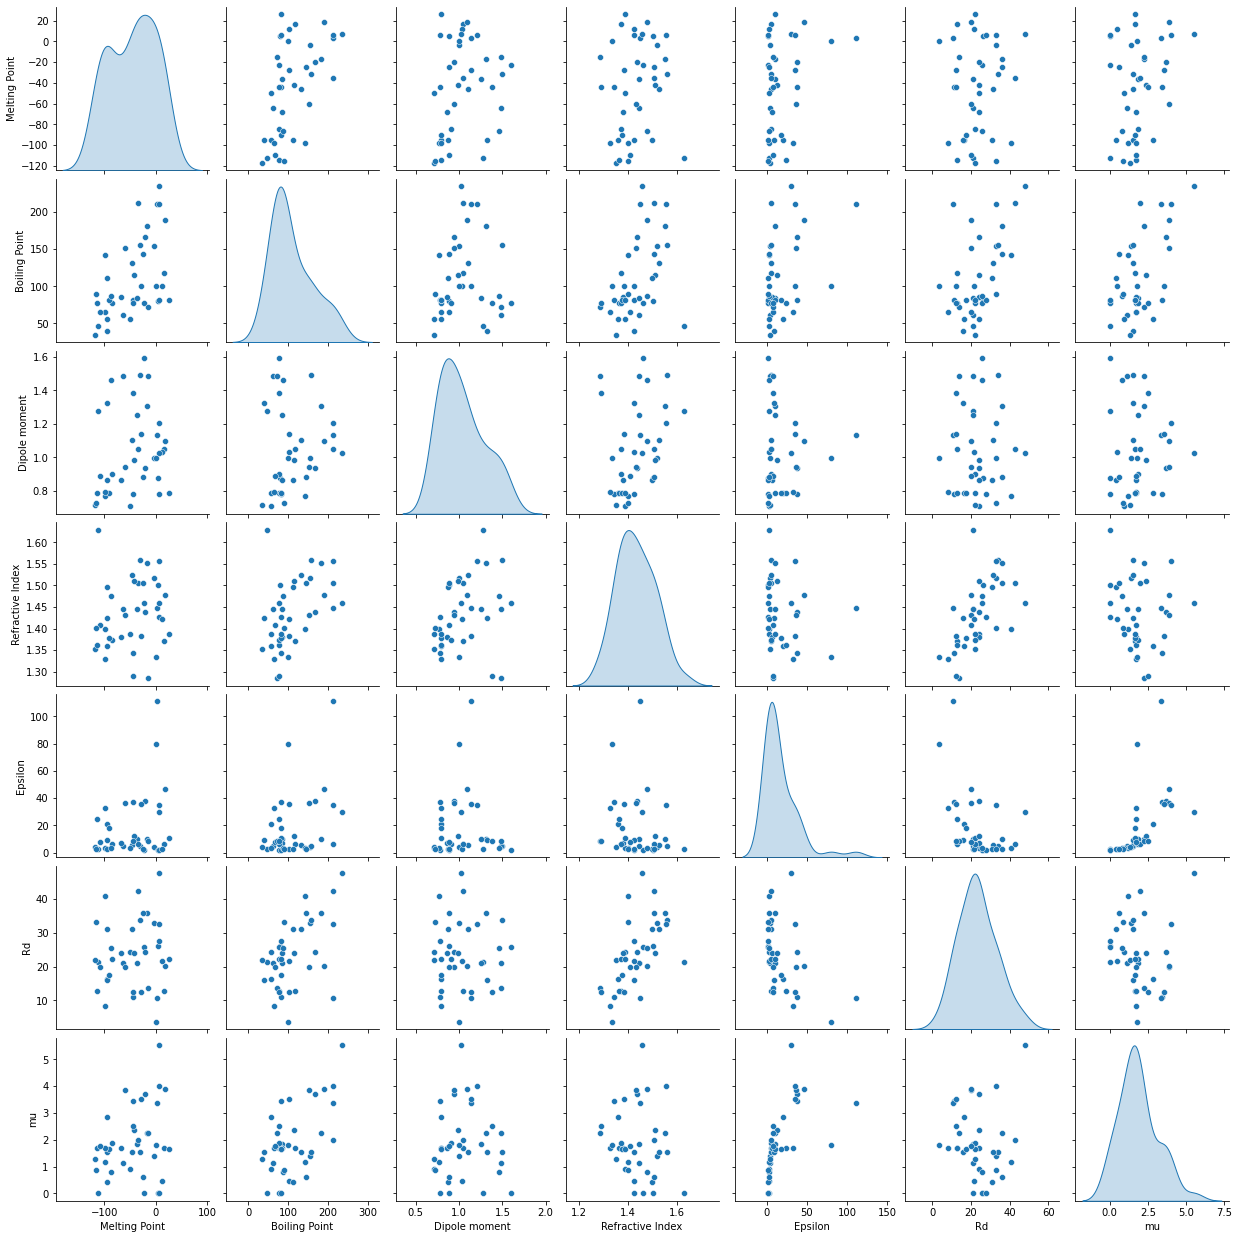

In [19]:
sns.pairplot(df, diag_kind="kde")
warnings.filterwarnings('ignore', message='your warning message goes here')

In [22]:
#correlation grid
correlation = df.corr() # creating a 2-D Matrix with correlation plots
correlation

,Melting Point,Boiling Point,Dipole moment,Refractive Index,Epsilon,Rd,mu
Melting Point,1.00000,0.52664,0.22073,0.16205,0.28420,0.08444,0.26677
Boiling Point,0.52664,1.00000,0.10738,0.46160,0.39635,0.52512,0.56740
Dipole moment,0.22073,0.10738,1.00000,0.30792,-0.04466,-0.00858,0.01339
Refractive Index,0.16205,0.46160,0.30792,1.00000,-0.16085,0.60488,-0.13108
Epsilon,0.28420,0.39635,-0.04466,-0.16085,1.00000,-0.44750,0.59196
Rd,0.08444,0.52512,-0.00858,0.60488,-0.44750,1.00000,-0.05911
mu,0.26677,0.56740,0.01339,-0.13108,0.59196,-0.05911,1.00000


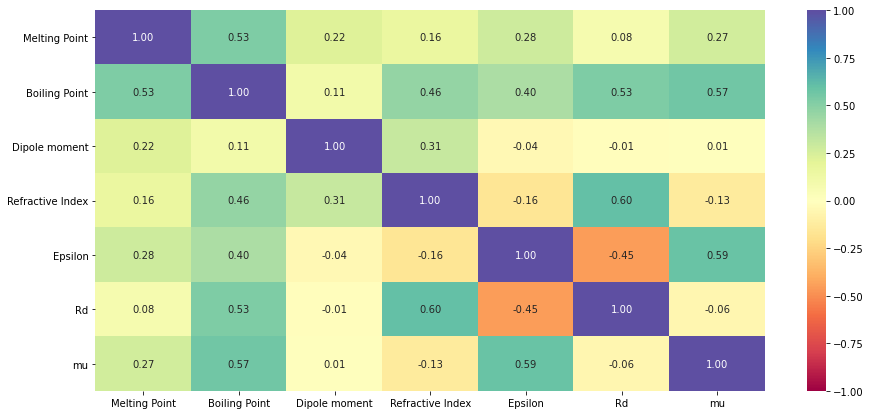

In [23]:
# Uncomment the following code for information of the arguments
# help(sns.heatmap)
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
1. Refractive index has a strong correlation with Relative Density(RD)
2. Same is the case with Epsilon and Mu.
3. Boiling point has a medium correlation with Boiling point 
4. Same is the case with Boiling Point and RD.
5. Determining the factors influencing Refractive Index and Relative Density would need further investigation.  

### Correlation between  Dipole Moment and Refractive Index

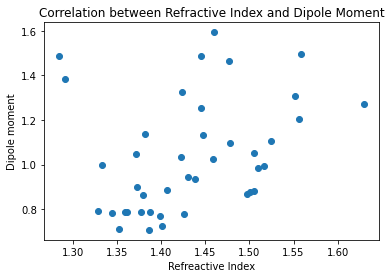

In [24]:
plt.scatter(df['Refractive Index'], df['Dipole moment'])
plt.xlabel('Refreactive Index')
plt.ylabel('Dipole moment')
plt.title('Correlation between Refractive Index and Dipole Moment')
plt.show()

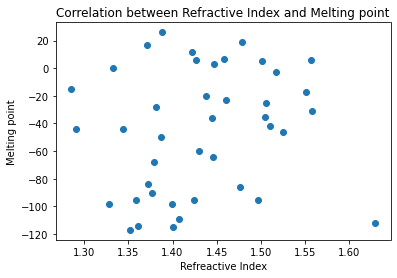

In [25]:
plt.scatter(df['Refractive Index'], df['Melting Point'])
plt.xlabel('Refreactive Index')
plt.ylabel('Melting point')
plt.title('Correlation between Refractive Index and Melting point')
plt.show()

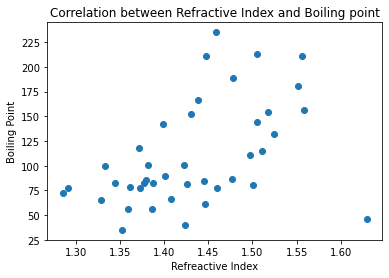

In [26]:
plt.scatter(df['Refractive Index'], df['Boiling Point'])
plt.xlabel('Refreactive Index')
plt.ylabel('Boiling Point')
plt.title('Correlation between Refractive Index and Boiling point')
plt.show()

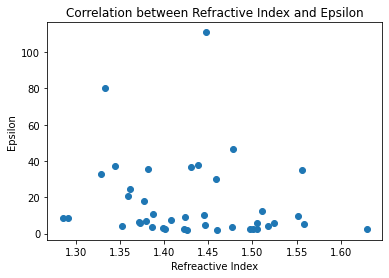

In [27]:
plt.scatter(df['Refractive Index'], df['Epsilon'])
plt.xlabel('Refreactive Index')
plt.ylabel('Epsilon')
plt.title('Correlation between Refractive Index and Epsilon')
plt.show()

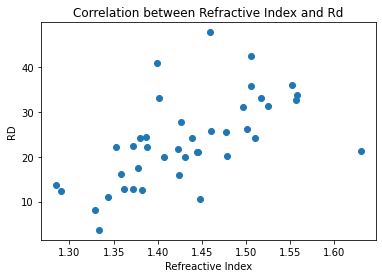

In [28]:
plt.scatter(df['Refractive Index'], df['Rd'])
plt.xlabel('Refreactive Index')
plt.ylabel('RD')
plt.title('Correlation between Refractive Index and Rd')
plt.show()

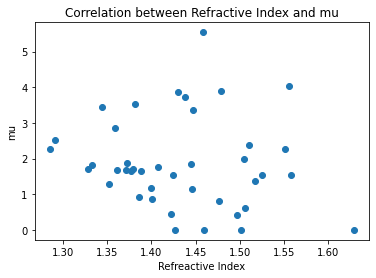

In [29]:
plt.scatter(df['Refractive Index'], df['mu'])
plt.xlabel('Refreactive Index')
plt.ylabel('mu')
plt.title('Correlation between Refractive Index and mu')
plt.show()

Observation: Considerable correlation between Refractive Index and RD.

### Variation in the number of colonies over the years 

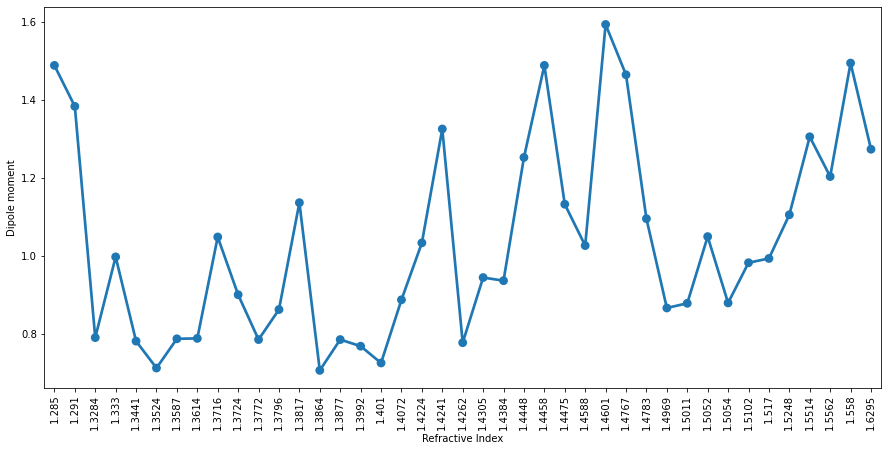

In [31]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='Refractive Index', y='Dipole moment', data=df, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations: 
Large Variations

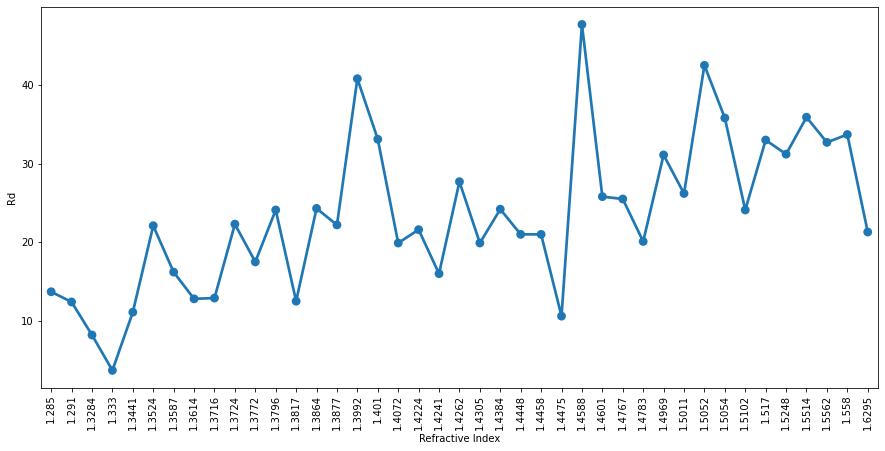

In [14]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='Refractive Index', y=('Rd'), data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Onservation: 
1. In contrast to Dipole moment, Rd has lower variations in relation to Refractive Index.
2. This indicates that the correlation between Rd and Refractive Index is stronger.

### Let us look at the correlation closer

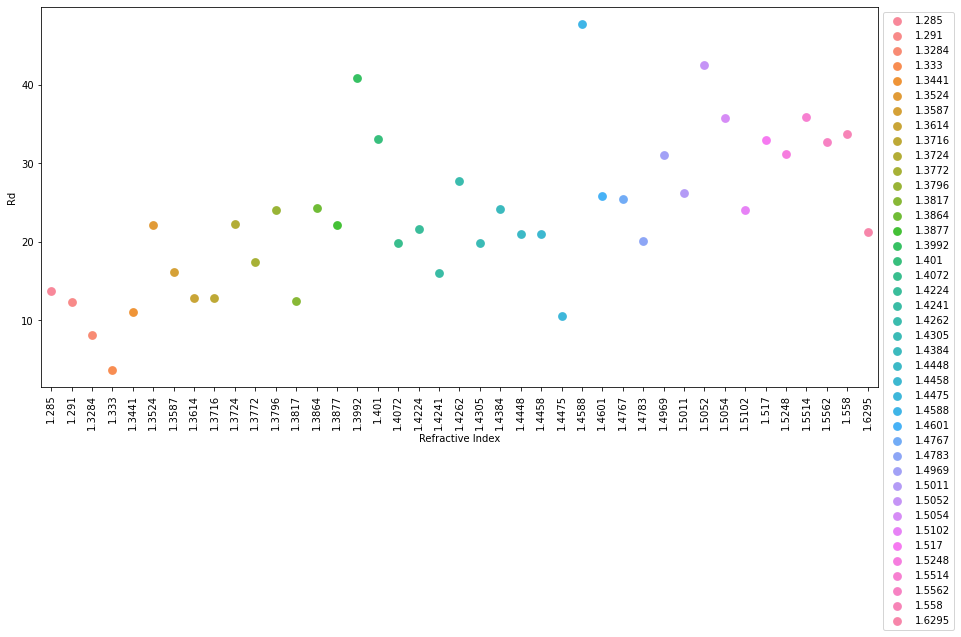

In [13]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='Refractive Index', y='Rd', data=df, estimator=sum, ci=None, hue = 'Refractive Index')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations: There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding. 

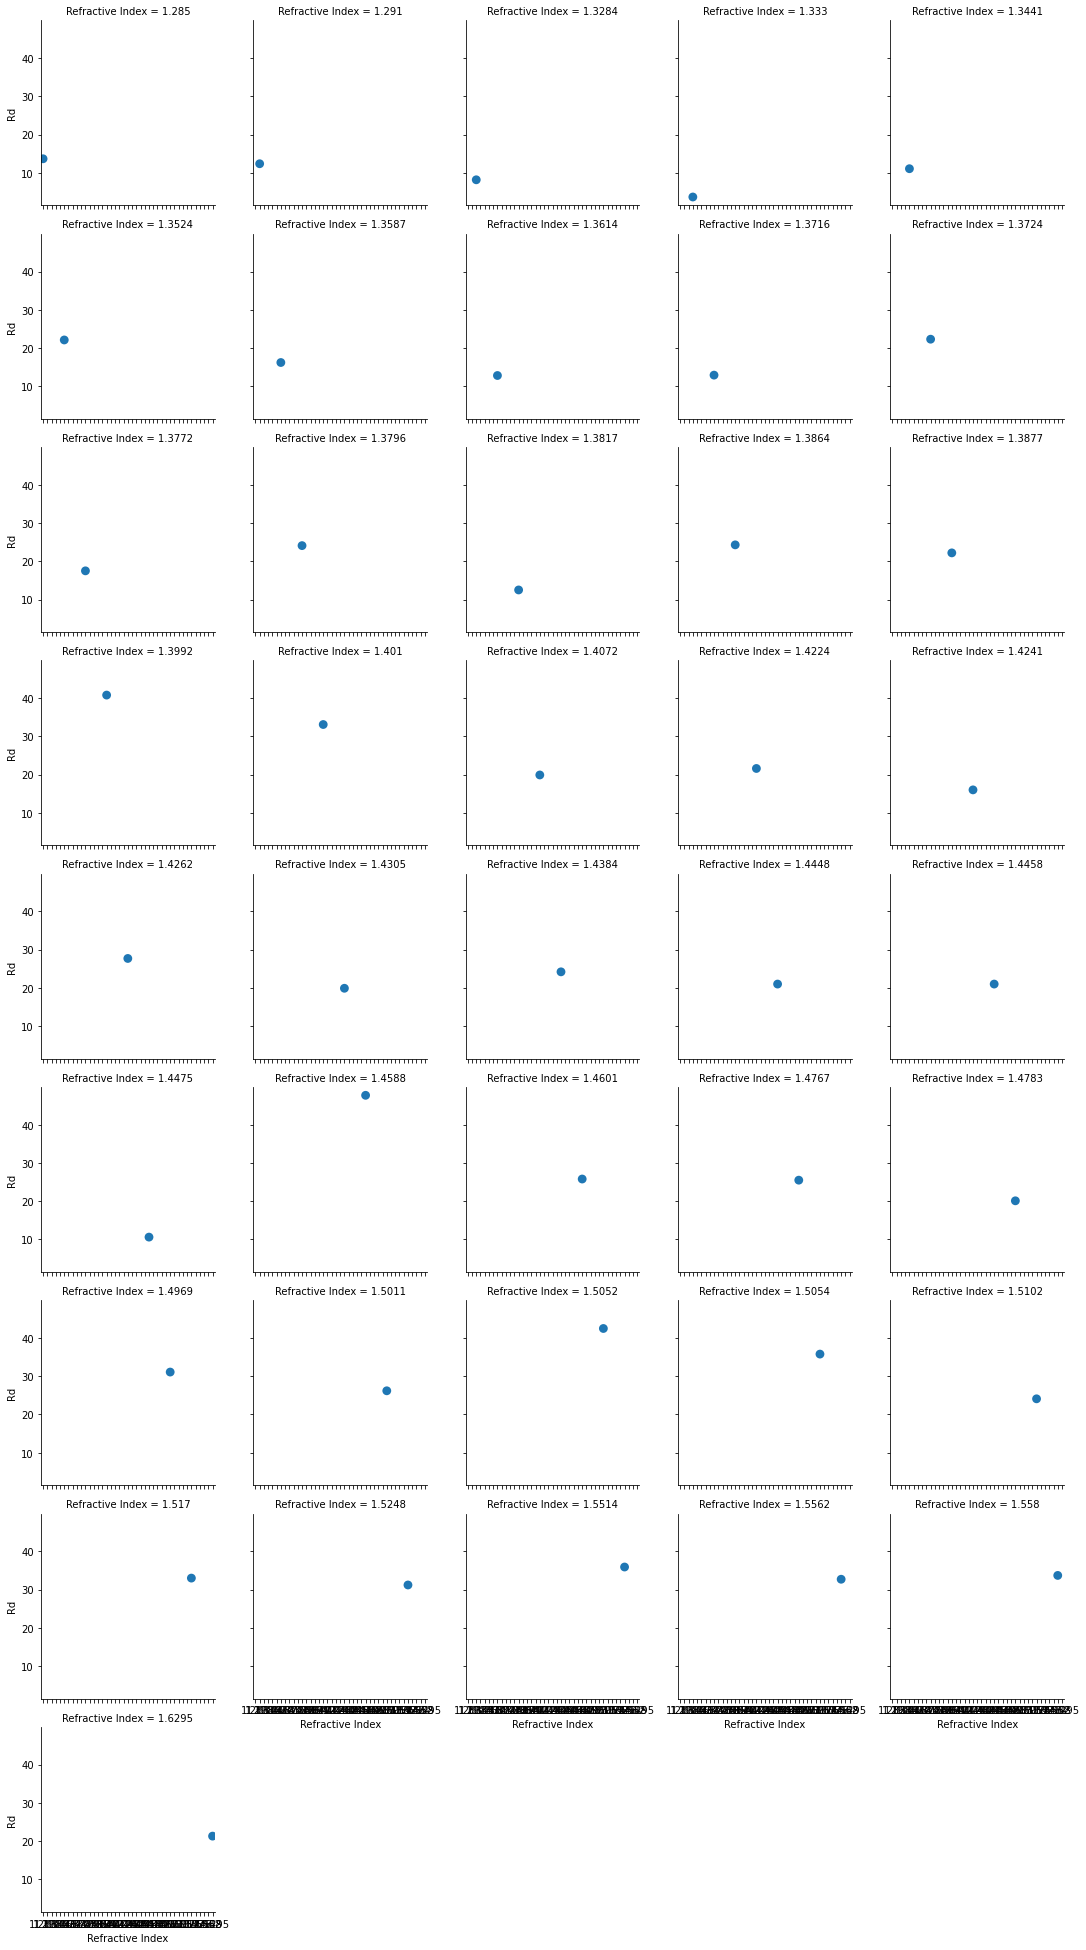

In [11]:
sns.catplot(x='Refractive Index', y='Rd', data=df,
                estimator=sum, col='Refractive Index', kind="point",
                height=3,col_wrap = 5)
plt.show()

Observations: 
Refractive Index mostly increases with increase of Relative Density

In [35]:
# Top 5 chemical compounds with Highest Refractive Index
df.groupby(['Substance'])['Refractive Index'].mean().sort_values(ascending = False).reset_index().head()

,Substance,Refractive Index
0,Carbondisulfide,1.62950
1,Bromobenzene,1.55800
2,Nitrobenzene,1.55620
3,o-dichlorobenzene,1.55140
4,Chlorobenzene,1.52480


### Conclusion

Considerable progress has been made in the study of the correlation between refractive index and other physical properties of solvents using Python. Importing and manipulating large datasets has been made easy with the use of libraries like Pandas and NumPy, and data visualization has been facilitated through Matplotlib and Seaborn libraries. 
Direct correlation plots show that property labeled as Rd (0.60) seems to have the best correlation, while other features of the data set did not show significant relationship.
In the future, statistical methods such as linear regression and correlation analysis have been applied to the data to study the relationship between refractive index and other physical properties of solvents.